In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Reviews.csv',nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [3]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [4]:
!pip install textblob
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',' ')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.Text.head()

C:\Users\abhis\AppData\Local\Temp\ipykernel_22760\3306574343.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]',' ')


KeyboardInterrupt: 

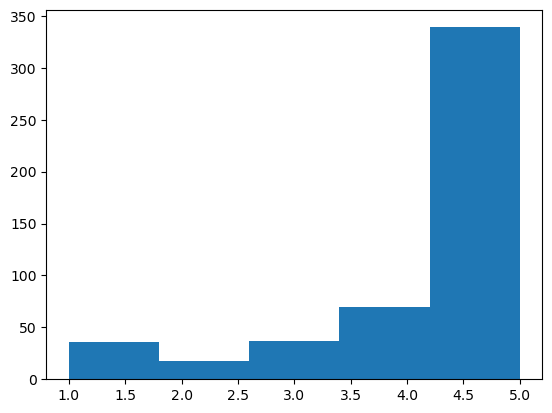

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [5]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [6]:
score_1=reviews[reviews['Score'] == 1].sample(n=18)
score_2=reviews[reviews['Score'] == 2].sample(n=18)
score_3=reviews[reviews['Score'] == 3].sample(n=18)
score_4=reviews[reviews['Score'] == 4].sample(n=18)
score_5=reviews[reviews['Score'] == 5].sample(n=18)

In [7]:
reviews_sample=pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


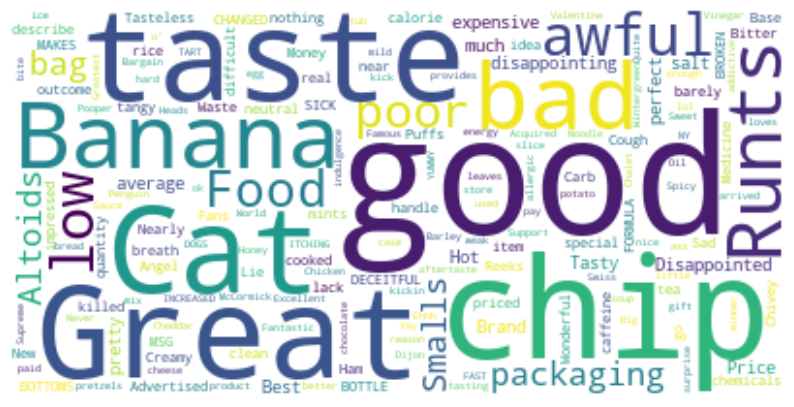

In [8]:
from wordcloud import WordCloud
reviews_str=" ".join(reviews_sample["Summary"].to_numpy())
wordcloud=WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
negative_reviews=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews=reviews_sample[reviews_sample['Score'].isin([1,2])]
negative_reviews_str=negative_reviews.Summary.str.cat()
positive_reviews_str=positive_reviews.Summary.str.cat()

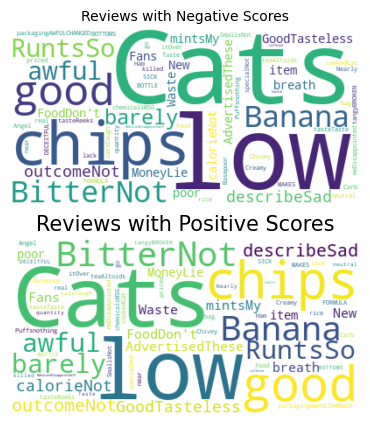

In [16]:
wordcloud_negative=WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive=WordCloud(background_color='white').generate(positive_reviews_str)
fig=plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=10)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=15)
plt.show()